In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv("../data/raw/Billionaires Statistics Dataset.csv") 
fig1 = go.Figure(data = go.Scattergeo(
    lon = df['longitude_country'],
    lat = df['latitude_country'],
    mode = 'markers',
    marker = dict(
        size = 8, 
        opacity = .7,
        color = df['finalWorth'],
        colorscale = 'Rainbow',
        colorbar = dict(title = 'Final Worth')
    )
))
fig1.update_geos(projection_type = 'natural earth')
fig1.update_layout(title = 'Distribuzione della ricchezza miliardaria sulla mappa del mondo')
fig1.write_image("../results/mappa_ricchezza.png")
fig1.show()
#print(df.head())
#print(df.columns.tolist())
# Lista delle colonne target candidate
#target_cols = ['category', 'industries', 'source', 'selfMade', 'gender']

# Per ogni colonna, stampa il numero di classi e le frequenze relative delle prime classi
#for col in target_cols:
#    print(f"🔎 Colonna: {col}")
#    print(f"Numero di classi: {df[col].nunique()}")
#    print("Distribuzione (prime 10 classi):")
#    print(df[col].value_counts(normalize=True).head(10))
#    print("-" * 40)


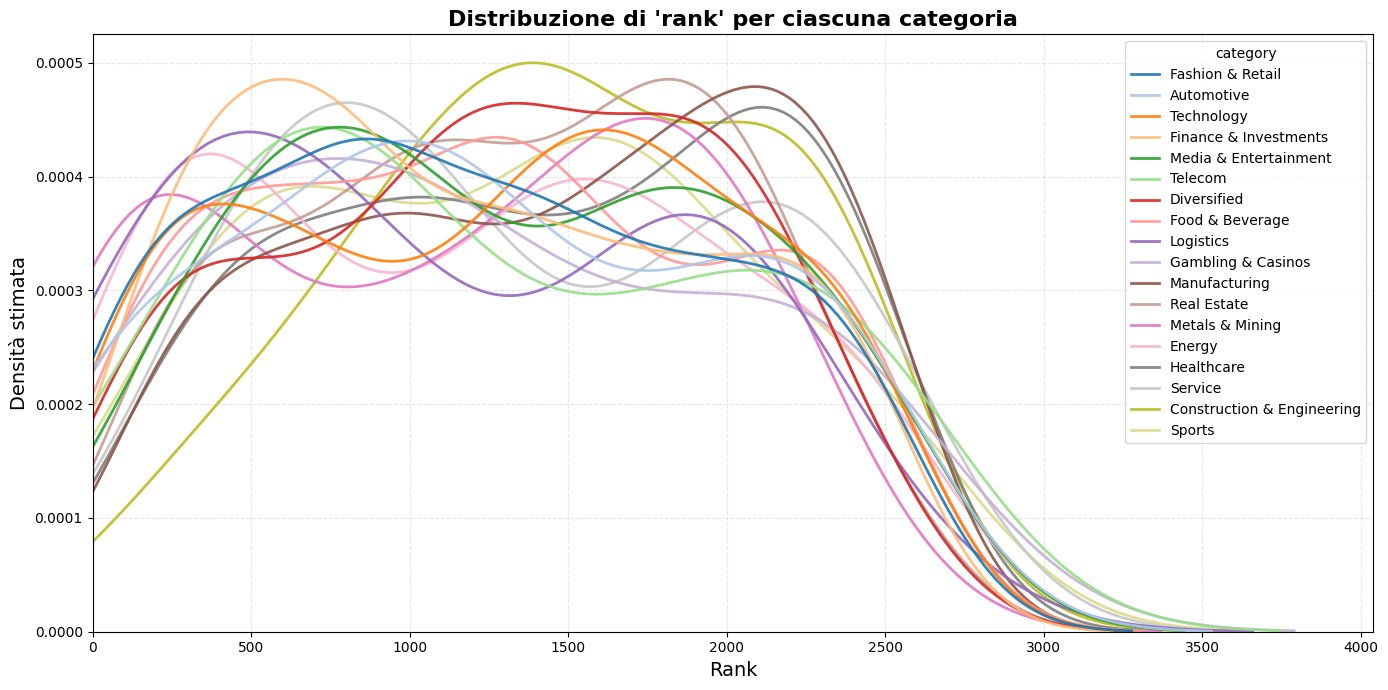

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Caricamento dati
df = pd.read_csv("../data/processed/billionaires_clean.csv")

# === Pulizia: rimuove valori nulli o negativi
df = df[df["rank"].notna()]
df = df[df["rank"] >= 0]

# === Impostazioni grafiche generali
plt.figure(figsize=(14, 7))

# === KDE migliorato
sns.kdeplot(
    data=df,
    x="rank",
    hue="category",
    fill=False,
    common_norm=False,
    linewidth=2,
    alpha=0.9,
    palette="tab20"  # palette con colori distinti per categorie numerose
)

# === Miglioramenti estetici
plt.title("Distribuzione di 'rank' per ciascuna categoria", fontsize=16, fontweight="bold")
plt.xlabel("Rank", fontsize=14)
plt.ylabel("Densità stimata", fontsize=14)
plt.xlim(left=0)
plt.grid(True, linestyle="--", alpha=0.3)


# === Legenda esterna ordinata solo se esiste
handles, labels = plt.gca().get_legend_handles_labels()

if labels:  # solo se la legenda non è vuota
    sorted_legend = sorted(zip(labels, handles), key=lambda x: x[0])
    labels, handles = zip(*sorted_legend)
    plt.legend(
        handles, labels,
        title="Categoria",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        borderaxespad=0.,
        fontsize="small",
        title_fontsize="medium"
    )


plt.tight_layout()


plt.savefig("../results/distribuzione_rank_per_categoria.png", dpi=300)

plt.show()


In [13]:
from scipy.stats import shapiro

for category in df["category"].unique():
    ranks = df[df["category"] == category]["rank"]
    stat, p = shapiro(ranks)
    print(f"{category:30s} → p-value: {p:.5f} {'(✓ normale)' if p > 0.05 else '(✗ NON normale)'}")


Fashion & Retail               → p-value: 0.00000 (✗ NON normale)
Automotive                     → p-value: 0.00253 (✗ NON normale)
Technology                     → p-value: 0.00000 (✗ NON normale)
Finance & Investments          → p-value: 0.00000 (✗ NON normale)
Media & Entertainment          → p-value: 0.00298 (✗ NON normale)
Telecom                        → p-value: 0.03226 (✗ NON normale)
Diversified                    → p-value: 0.00009 (✗ NON normale)
Food & Beverage                → p-value: 0.00000 (✗ NON normale)
Logistics                      → p-value: 0.00860 (✗ NON normale)
Gambling & Casinos             → p-value: 0.12509 (✓ normale)
Manufacturing                  → p-value: 0.00000 (✗ NON normale)
Real Estate                    → p-value: 0.00005 (✗ NON normale)
Metals & Mining                → p-value: 0.00009 (✗ NON normale)
Energy                         → p-value: 0.00006 (✗ NON normale)
Healthcare                     → p-value: 0.00000 (✗ NON normale)
Service       

Numero di istanze per classe:
category
Automotive                     71
Construction & Engineering     42
Diversified                   187
Energy                        100
Fashion & Retail              261
Finance & Investments         364
Food & Beverage               209
Gambling & Casinos             25
Healthcare                    200
Logistics                      39
Manufacturing                 319
Media & Entertainment          87
Metals & Mining                72
Real Estate                   191
Service                        53
Sports                         39
Technology                    313
Telecom                        30
Name: count, dtype: int64


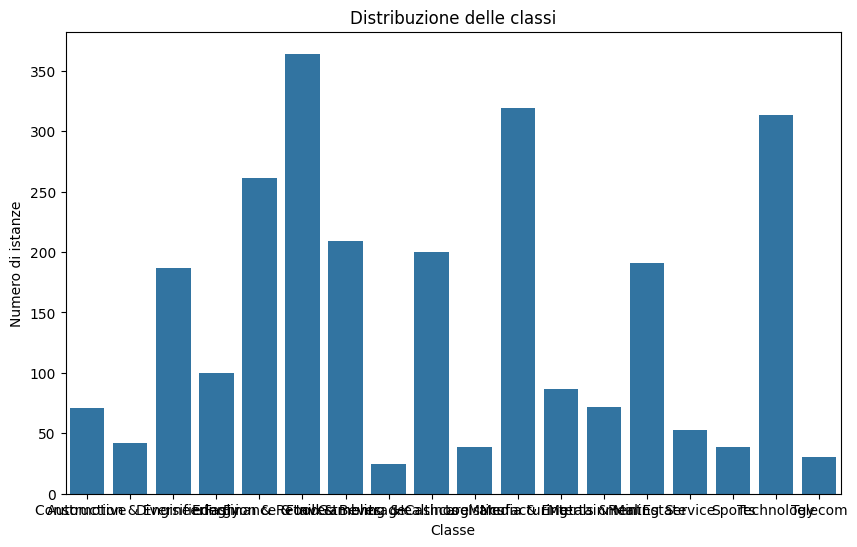

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset
df = pd.read_csv("../data/processed/billionaires_clean.csv")

# Sostituisci 'target' con il nome della tua colonna target
class_counts = df['category'].value_counts().sort_index()

print("Numero di istanze per classe:")
print(class_counts)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Classe")
plt.ylabel("Numero di istanze")
plt.title("Distribuzione delle classi")
plt.show()


Numero di istanze per classe (dopo accorpamento):
0    166
1    131
2     70
3    396
4    382
5    389
6    314
Name: count, dtype: int64


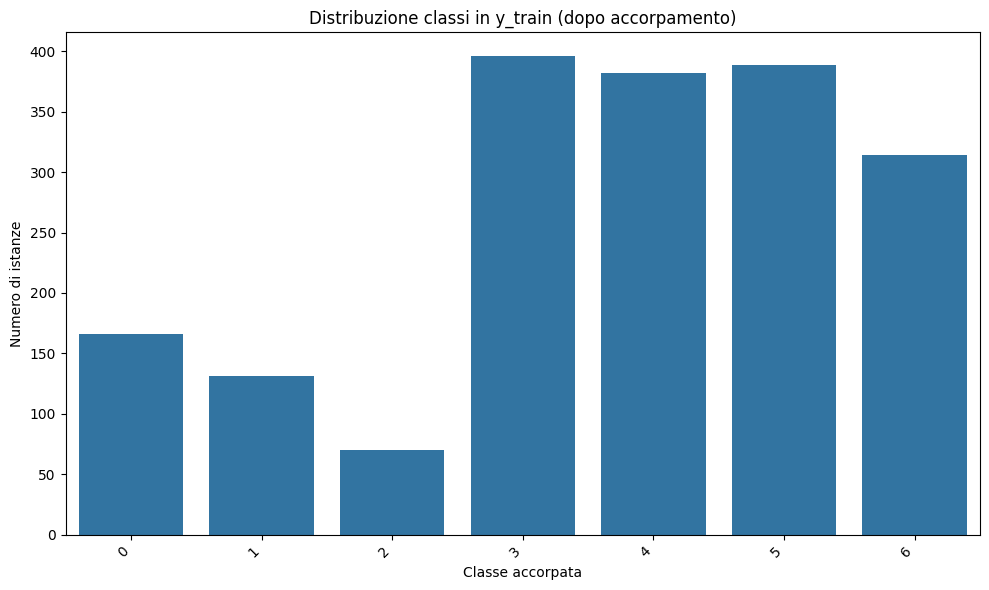

Numero di istanze per classe (dopo accorpamento):
0     71
1     56
2     30
3    169
4    164
5    167
6    135
Name: count, dtype: int64


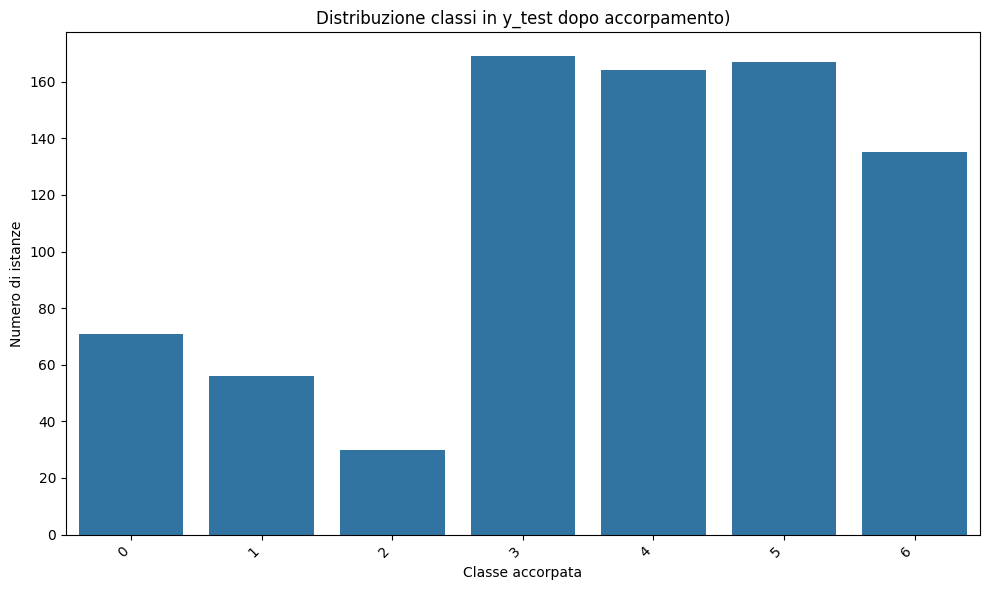

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X_train = pd.read_csv("../data/splitted_category/X_train.csv")
X_test = pd.read_csv("../data/splitted_category/X_test.csv")
y_train = pd.read_csv("../data/splitted_category/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted_category/y_test.csv").values.ravel()  
# Converte y_train in una Series per conteggio
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Conta e ordina
class_counts1 = y_train_series.value_counts().sort_index()
class_counts2 = y_test_series.value_counts().sort_index()
#class_counts3 = X_train_series.value_counts().sort_index()
#class_counts4 = X_test_series.value_counts().sort_index()


print("Numero di istanze per classe (dopo accorpamento):")
print(class_counts1)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts1.index, y=class_counts1.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classe accorpata")
plt.ylabel("Numero di istanze")
plt.title("Distribuzione classi in y_train (dopo accorpamento)")
plt.tight_layout()
plt.show()


print("Numero di istanze per classe (dopo accorpamento):")
print(class_counts2)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts2.index, y=class_counts2.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classe accorpata")
plt.ylabel("Numero di istanze")
plt.title("Distribuzione classi in y_test dopo accorpamento)")
plt.tight_layout()
plt.show()
